---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

In [1242]:
import pandas as pd
import numpy as np

def blight_model():
    
    # Your code here
    
    return # Your answer here

In [1243]:
blight_model()

In [1244]:
df = pd.read_csv("train.csv", encoding = 'ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1245]:
df.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [1246]:
df.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [1247]:
train_df = df[['ticket_id', 'zip_code','ticket_issued_date', 'hearing_date', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'compliance']]

In [1248]:
train_df.head()

,ticket_id,zip_code,ticket_issued_date,hearing_date,fine_amount,admin_fee,state_fee,late_fee,discount_amount,compliance
0,22056,60606,2004-03-16 11:40:00,2005-03-21 10:30:00,250.0,20.0,10.0,25.0,0.0,0.0
1,27586,48208,2004-04-23 12:30:00,2005-05-06 13:30:00,750.0,20.0,10.0,75.0,0.0,1.0
2,22062,48223,2004-04-26 13:40:00,2005-03-29 10:30:00,250.0,0.0,0.0,0.0,0.0,NaN
3,22084,48214,2004-04-26 13:30:00,NaN,250.0,0.0,0.0,0.0,0.0,NaN
4,22093,48206,2004-04-26 13:00:00,2005-03-29 10:30:00,250.0,0.0,0.0,0.0,0.0,NaN


In [1249]:
latlon = pd.read_csv('latlons.csv')

In [1250]:
latlon.head()

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


In [1251]:
address = pd.read_csv('addresses.csv')

In [1252]:
address.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [1253]:
address.shape

(311307, 2)

In [1254]:
train_df.shape

(250306, 10)

In [1255]:
latlon.shape

(121769, 3)

In [1256]:
new_train = pd.merge(train_df, address, on='ticket_id')

In [1257]:
new_train.shape

(250306, 11)

In [1258]:
new_train_df = pd.merge(new_train, latlon, on='address')

In [1259]:
new_train_df.shape

(250306, 13)

In [1260]:
new_train_df.head()

,ticket_id,zip_code,ticket_issued_date,hearing_date,fine_amount,admin_fee,state_fee,late_fee,discount_amount,compliance,address,lat,lon
0,22056,60606,2004-03-16 11:40:00,2005-03-21 10:30:00,250.0,20.0,10.0,25.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,77242,60606,2006-05-24 09:00:00,2006-06-27 15:00:00,500.0,20.0,10.0,50.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
2,77243,60606,2006-05-24 09:00:00,2006-06-27 15:00:00,250.0,20.0,10.0,25.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
3,103945,60606,2006-12-05 10:15:00,2007-02-07 13:30:00,500.0,0.0,0.0,0.0,0.0,NaN,"2900 tyler, Detroit MI",42.390729,-83.124268
4,138219,60606,2007-09-21 14:45:00,2008-02-05 10:30:00,100.0,20.0,10.0,10.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268


In [1261]:
new_train_df.dropna(inplace=True)

In [1262]:
new_train_df.head()

,ticket_id,zip_code,ticket_issued_date,hearing_date,fine_amount,admin_fee,state_fee,late_fee,discount_amount,compliance,address,lat,lon
0,22056,60606,2004-03-16 11:40:00,2005-03-21 10:30:00,250.0,20.0,10.0,25.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,77242,60606,2006-05-24 09:00:00,2006-06-27 15:00:00,500.0,20.0,10.0,50.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
2,77243,60606,2006-05-24 09:00:00,2006-06-27 15:00:00,250.0,20.0,10.0,25.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
4,138219,60606,2007-09-21 14:45:00,2008-02-05 10:30:00,100.0,20.0,10.0,10.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
5,177558,60606,2008-06-13 10:00:00,2008-09-03 09:00:00,300.0,20.0,10.0,30.0,0.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268


In [1263]:
new_train_df.shape

(159651, 13)

In [1264]:
ticket_id = new_train_df['ticket_id']
compliance = new_train_df['compliance']
new_train_df.drop(['ticket_id', 'compliance', 'address'], inplace=True, axis=1)

In [1265]:
import datetime
new_train_df['ticket_issued_data1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['ticket_issued_date']]

In [1266]:
import datetime
new_train_df['ticket_issued_data1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['ticket_issued_date']]
new_train_df['hearing_date1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['hearing_date']]

In [1267]:
new_train_df.head()

,zip_code,ticket_issued_date,hearing_date,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,ticket_issued_data1,hearing_date1
0,60606,2004-03-16 11:40:00,2005-03-21 10:30:00,250.0,20.0,10.0,25.0,0.0,42.390729,-83.124268,2004-03-16,2005-03-21
1,60606,2006-05-24 09:00:00,2006-06-27 15:00:00,500.0,20.0,10.0,50.0,0.0,42.390729,-83.124268,2006-05-24,2006-06-27
2,60606,2006-05-24 09:00:00,2006-06-27 15:00:00,250.0,20.0,10.0,25.0,0.0,42.390729,-83.124268,2006-05-24,2006-06-27
4,60606,2007-09-21 14:45:00,2008-02-05 10:30:00,100.0,20.0,10.0,10.0,0.0,42.390729,-83.124268,2007-09-21,2008-02-05
5,60606,2008-06-13 10:00:00,2008-09-03 09:00:00,300.0,20.0,10.0,30.0,0.0,42.390729,-83.124268,2008-06-13,2008-09-03


In [1268]:
import datetime

date_time_str = '2018-06-29'  
date_time_str1 = '2019-06-29'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')
date_time_obj1 = datetime.datetime.strptime(date_time_str1, '%Y-%m-%d')

In [1269]:
(date_time_obj1 - date_time_obj).days

365

In [1270]:
new_train_df['days1'] = (new_train_df['hearing_date1']- new_train_df['ticket_issued_data1'])

In [1271]:
new_train_df['days1'] = (new_train_df['hearing_date1']- new_train_df['ticket_issued_data1'])
new_train_df['days'] = [x.days for x in new_train_df['days1']]

In [1272]:
new_train_df.drop(['zip_code', 'ticket_issued_date', 'hearing_date', 'ticket_issued_data1', 
                  'hearing_date1', 'days1'], axis=1, inplace=True)

In [1273]:
new_train_df.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,days
0,250.0,20.0,10.0,25.0,0.0,42.390729,-83.124268,370
1,500.0,20.0,10.0,50.0,0.0,42.390729,-83.124268,34
2,250.0,20.0,10.0,25.0,0.0,42.390729,-83.124268,34
4,100.0,20.0,10.0,10.0,0.0,42.390729,-83.124268,137
5,300.0,20.0,10.0,30.0,0.0,42.390729,-83.124268,82


In [1274]:
new_train_df.shape

(159651, 8)

In [1275]:
import seaborn as sns

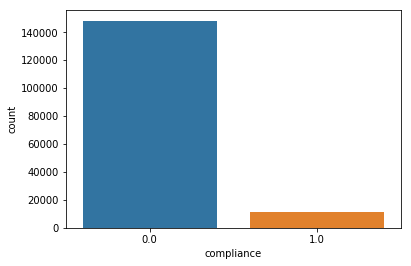

In [1276]:
sns.countplot(compliance)

In [1277]:
zeros = compliance[compliance == 0].count()

In [1278]:
ones = compliance[compliance == 1].count()

In [1279]:
ones/zeros

0.0771218459047362

In [1280]:
zeros/ones

12.966494619893274

In [1281]:
new_train_df['compliance'] = compliance

In [1282]:
new_train_df.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,days,compliance
0,250.0,20.0,10.0,25.0,0.0,42.390729,-83.124268,370,0.0
1,500.0,20.0,10.0,50.0,0.0,42.390729,-83.124268,34,0.0
2,250.0,20.0,10.0,25.0,0.0,42.390729,-83.124268,34,0.0
4,100.0,20.0,10.0,10.0,0.0,42.390729,-83.124268,137,0.0
5,300.0,20.0,10.0,30.0,0.0,42.390729,-83.124268,82,0.0


In [1283]:
df_zeros = new_train_df[new_train_df['compliance'] == 0]
df_ones = new_train_df[new_train_df['compliance']==1]
new_count_zeros = int(df_ones['compliance'].count() + 0.5 * df_ones['compliance'].count())

In [1284]:
from sklearn.utils import resample

In [1285]:
df_zeros_downsampled = resample(df_zeros, replace=False,
                                n_samples= new_count_zeros,
                               random_state=123)

In [1286]:
train_df_downsampled = pd.concat([df_zeros_downsampled, df_ones])

In [1287]:
train_df_downsampled.reset_index(inplace=True, drop=True)

In [1288]:
train_df_downsampled.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,days,compliance
0,250.0,20.0,10.0,0.0,0.0,42.381874,-83.131773,15,0.0
1,250.0,20.0,10.0,25.0,0.0,42.396959,-82.985916,99,0.0
2,500.0,20.0,10.0,50.0,0.0,42.309277,-83.112145,28,0.0
3,200.0,20.0,10.0,20.0,0.0,42.430903,-83.175991,26,0.0
4,1000.0,20.0,10.0,100.0,0.0,42.415121,-83.227061,164,0.0


In [1289]:
compliance = train_df_downsampled['compliance']

In [1290]:
train_df = train_df_downsampled.drop(['compliance'], axis=1)

In [1291]:
train_df.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,days
0,250.0,20.0,10.0,0.0,0.0,42.381874,-83.131773,15
1,250.0,20.0,10.0,25.0,0.0,42.396959,-82.985916,99
2,500.0,20.0,10.0,50.0,0.0,42.309277,-83.112145,28
3,200.0,20.0,10.0,20.0,0.0,42.430903,-83.175991,26
4,1000.0,20.0,10.0,100.0,0.0,42.415121,-83.227061,164


In [1292]:
train_df.shape

(28577, 8)

In [1293]:
df_zeros_downsampled.shape

(17146, 9)

In [1294]:
df_ones.shape

(11431, 9)

In [1295]:
train_df.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,days
0,250.0,20.0,10.0,0.0,0.0,42.381874,-83.131773,15
1,250.0,20.0,10.0,25.0,0.0,42.396959,-82.985916,99
2,500.0,20.0,10.0,50.0,0.0,42.309277,-83.112145,28
3,200.0,20.0,10.0,20.0,0.0,42.430903,-83.175991,26
4,1000.0,20.0,10.0,100.0,0.0,42.415121,-83.227061,164


In [1296]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1297]:
X_train_scaled = scaler.fit_transform(train_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [1298]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_depth=5)

In [1299]:
clf.fit(X_train_scaled, compliance)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [1300]:
X_train_scaled.shape

(28577, 8)

In [1301]:
test_df = pd.read_csv('test.csv')

In [1302]:
test_df.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [1303]:
train_df.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,days
0,250.0,20.0,10.0,0.0,0.0,42.381874,-83.131773,15
1,250.0,20.0,10.0,25.0,0.0,42.396959,-82.985916,99
2,500.0,20.0,10.0,50.0,0.0,42.309277,-83.112145,28
3,200.0,20.0,10.0,20.0,0.0,42.430903,-83.175991,26
4,1000.0,20.0,10.0,100.0,0.0,42.415121,-83.227061,164


In [1304]:
test_df.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status'],
      dtype='object')

In [1305]:
ticket_id_test = test_df['ticket_id']

In [1306]:
train_df.columns

Index(['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'lat', 'lon', 'days'],
      dtype='object')

In [1307]:
X_test = test_df[['fine_amount', 'admin_fee', 'state_fee', 'late_fee',
                 'discount_amount']]

In [1308]:
test_df.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [1309]:
latlon.head()

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


In [1310]:
address.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [1311]:
new_test = pd.merge(test_df, address, on='ticket_id')

In [1312]:
new_test_df = pd.merge(new_test, latlon, on='address')

In [1313]:
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61001 entries, 0 to 61000
Data columns (total 30 columns):
ticket_id                     61001 non-null int64
agency_name                   61001 non-null object
inspector_name                61001 non-null object
violator_name                 60973 non-null object
violation_street_number       61001 non-null float64
violation_street_name         61001 non-null object
violation_zip_code            24024 non-null object
mailing_address_str_number    59987 non-null object
mailing_address_str_name      60998 non-null object
city                          61000 non-null object
state                         60670 non-null object
zip_code                      60998 non-null object
non_us_str_code               0 non-null float64
country                       61001 non-null object
ticket_issued_date            61001 non-null object
hearing_date                  58804 non-null object
violation_code                61001 non-null object
violation_

In [1314]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61001 entries, 0 to 61000
Data columns (total 27 columns):
ticket_id                     61001 non-null int64
agency_name                   61001 non-null object
inspector_name                61001 non-null object
violator_name                 60973 non-null object
violation_street_number       61001 non-null float64
violation_street_name         61001 non-null object
violation_zip_code            24024 non-null object
mailing_address_str_number    59987 non-null object
mailing_address_str_name      60998 non-null object
city                          61000 non-null object
state                         60670 non-null object
zip_code                      60998 non-null object
non_us_str_code               0 non-null float64
country                       61001 non-null object
ticket_issued_date            61001 non-null object
hearing_date                  58804 non-null object
violation_code                61001 non-null object
violation_

In [1315]:
clf.score(X_train_scaled, compliance)

0.7615914896595164

In [1316]:
new_test_df.fillna(0, inplace=True)

import datetime
new_test_df['ticket_issued_date1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_test_df['ticket_issued_date']]

new_test_df['hearing_date1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_test_df['hearing_date']]

In [1317]:
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61001 entries, 0 to 61000
Data columns (total 30 columns):
ticket_id                     61001 non-null int64
agency_name                   61001 non-null object
inspector_name                61001 non-null object
violator_name                 61001 non-null object
violation_street_number       61001 non-null float64
violation_street_name         61001 non-null object
violation_zip_code            61001 non-null object
mailing_address_str_number    61001 non-null object
mailing_address_str_name      61001 non-null object
city                          61001 non-null object
state                         61001 non-null object
zip_code                      61001 non-null object
non_us_str_code               61001 non-null float64
country                       61001 non-null object
ticket_issued_date            61001 non-null object
hearing_date                  61001 non-null object
violation_code                61001 non-null object
violat

In [1318]:
def find_dt_object(df, column_name):
    import datetime
    arr = []
    for x in df[column_name]:
        if x != 0:
            arr.append(datetime.datetime.strptime(x[:10], '%Y-%m-%d'))
        else:
            arr.append(None)
    return arr

In [1319]:
new_test_df['ticket_issued_date1'] = find_dt_object(new_test_df, 'ticket_issued_date')

In [1320]:
new_test_df['hearing_date1'] = find_dt_object(new_test_df, 'hearing_date')

In [1321]:
def days(df):
    days = []
    for i in range(len(df['hearing_date1'])):
        if df['hearing_date1'][i] != 0:
            days.append((df['hearing_date1'][i]-df['ticket_issued_date1'][i]).days)
    return days

In [1322]:
new_test_df['days'] = days(new_test_df)

In [1323]:
new_test_df.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,discount_amount,clean_up_cost,judgment_amount,grafitti_status,address,lat,lon,ticket_issued_date1,hearing_date1,days
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,0,141,ROSEBERRY,DETROIT,...,0.0,0.0,250.0,0,"10041 roseberry, Detroit MI",42.407581,-82.986642,2012-01-04,2012-01-19,15.0
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,0,19136,GLASTONBURY,DETROIT,...,0.0,0.0,1130.0,0,"18520 evergreen, Detroit MI",42.426239,-83.238259,2012-01-05,2012-02-06,32.0
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,0,19136,GLASTONBURY,DETROIT,...,0.0,0.0,140.0,0,"18520 evergreen, Detroit MI",42.426239,-83.238259,2012-01-05,2012-02-06,32.0
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,0,2246,NELSON,WOODHAVEN,...,0.0,0.0,250.0,0,"1835 central, Detroit MI",42.309661,-83.122426,2012-01-05,2012-02-07,33.0
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,0,3435,MUNGER,LIVONIA,...,0.0,0.0,140.0,0,"1700 central, Detroit MI",42.308830,-83.121116,2012-01-05,2012-02-14,40.0


In [1324]:
new_train_df.columns

Index(['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'lat', 'lon', 'days', 'compliance'],
      dtype='object')

In [1325]:
ticket_id_test = new_test_df[['ticket_id']]
new_test_df = new_test_df[['fine_amount', 'admin_fee', 'state_fee',
                           'late_fee', 'discount_amount','lat',
                           'lon', 'days']]

In [1326]:
new_test_df.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,lat,lon,days
0,200.0,20.0,10.0,20.0,0.0,42.407581,-82.986642,15.0
1,1000.0,20.0,10.0,100.0,0.0,42.426239,-83.238259,32.0
2,100.0,20.0,10.0,10.0,0.0,42.426239,-83.238259,32.0
3,200.0,20.0,10.0,20.0,0.0,42.309661,-83.122426,33.0
4,100.0,20.0,10.0,10.0,0.0,42.308830,-83.121116,40.0


In [1327]:
new_test_df.fillna(0, inplace=True)

In [1328]:
predictions = clf.predict_proba(new_test_df)

In [1329]:
clf.classes_

array([0., 1.])

In [1330]:
series = pd.Series(predictions[:,1], ticket_id_test['ticket_id'])

pd.Series(predictions[:,1], ticket_id_test)

pd.Series(data=predictions[:,1], index=ticket_id_test['ticket_id'])

predictions[:,1]

predictions[:,1][np.isnan(predictions[:,1])]

ticket_id_test

data = {'predictions': predictions[:,1], 'ticket_id':ticket_id_test.values}

predictions[:,1]

bm = blight_model()
res = 'Data type Test: '
res += ['Failed: type(bm) should Series\n','Passed\n'][type(bm)==pd.Series]
res += 'Data shape Test: '
res += ['Failed: len(bm) should be 61001\n','Passed\n'][len(bm)==61001]
res += 'Data Values Test: '
res += ['Failed: all values should be in [0.,1.]\n','Passed\n'][all((bm<=1.) & (bm>=0.))]
res += 'Data Values type Test: '
res += ['Failed: bm.dtype should be float\n','Passed\n'][str(bm.dtype).count('float')>0]
res += 'Index type Test: '
res += ['Failed: type(bm.index) should be Int64Index\n','Passed\n'][type(bm.index)==pd.Int64Index]
res += 'Index values type Test: '
res += ['Failed: type(bm.index[0]) should be int64\n','Passed\n'][str(type(bm.index[0])).count("int64")>0]

res += 'Output index shape test:'
res += ['Failed, bm.index.shape should be (61001,)\n','Passed\n'][bm.index.shape==(61001,)]

res += 'Output index test: '
if bm.index.shape==(61001,):
    res +=['Failed\n','Passed\n'][all(pd.read_csv('test.csv',usecols=[0],index_col=0).sort_index().index.values==bm.sort_index().index.values)]
else:
    res+='Failed'
print(res)

In [1]:
# Train data clearning

import pandas as pd
import datetime
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv("train.csv", encoding = 'ISO-8859-1')
train_df = df[['ticket_id', 'zip_code','ticket_issued_date', 'hearing_date', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'compliance']]
latlon = pd.read_csv('latlons.csv')
address = pd.read_csv('addresses.csv')
new_train = pd.merge(train_df, address, on='ticket_id')
new_train_df = pd.merge(new_train, latlon, on='address')
new_train_df.dropna(inplace=True)
ticket_id = new_train_df['ticket_id']
compliance = new_train_df['compliance']
new_train_df.drop(['ticket_id', 'compliance', 'address'], inplace=True, axis=1)
new_train_df['ticket_issued_data1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['ticket_issued_date']]
new_train_df['ticket_issued_data1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['ticket_issued_date']]
new_train_df['hearing_date1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['hearing_date']]
new_train_df['days1'] = (new_train_df['hearing_date1']- new_train_df['ticket_issued_data1'])
new_train_df['days1'] = (new_train_df['hearing_date1']- new_train_df['ticket_issued_data1'])
new_train_df['days'] = [x.days for x in new_train_df['days1']]
new_train_df.drop(['zip_code', 'ticket_issued_date', 'hearing_date', 'ticket_issued_data1', 
                  'hearing_date1', 'days1'], axis=1, inplace=True)
zeros = compliance[compliance == 0].count()
ones = compliance[compliance == 1].count()
new_train_df['compliance'] = compliance
df_zeros = new_train_df[new_train_df['compliance'] == 0]
df_ones = new_train_df[new_train_df['compliance']==1]
new_count_zeros = int(df_ones['compliance'].count() + 0.5 * df_ones['compliance'].count())
df_zeros_downsampled = resample(df_zeros, replace=False,
                                n_samples= new_count_zeros,
                               random_state=123)
train_df_downsampled = pd.concat([df_zeros_downsampled, df_ones])
train_df_downsampled.reset_index(inplace=True, drop=True)
compliance = train_df_downsampled['compliance']
train_df = train_df_downsampled.drop(['compliance'], axis=1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_df)

clf = GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_depth=5)
clf.fit(X_train_scaled, compliance)

# test data cleaning

test_df = pd.read_csv('test.csv')
ticket_id_test = test_df['ticket_id']
X_test = test_df[['fine_amount', 'admin_fee', 'state_fee', 'late_fee',
                 'discount_amount']]
new_test = pd.merge(test_df, address, on='ticket_id')
new_test_df = pd.merge(new_test, latlon, on='address')
new_test_df.fillna(0, inplace=True)

def find_dt_object(df, column_name):
    import datetime
    arr = []
    for x in df[column_name]:
        if x != 0:
            arr.append(datetime.datetime.strptime(x[:10], '%Y-%m-%d'))
        else:
            arr.append(None)
    return arr
new_test_df['ticket_issued_date1'] = find_dt_object(new_test_df, 'ticket_issued_date')
new_test_df['hearing_date1'] = find_dt_object(new_test_df, 'hearing_date')

def days(df):
    days = []
    for i in range(len(df['hearing_date1'])):
        if df['hearing_date1'][i] != 0:
            days.append((df['hearing_date1'][i]-df['ticket_issued_date1'][i]).days)
    return days
new_test_df['days'] = days(new_test_df)

ticket_id_test = new_test_df[['ticket_id']]
new_test_df = new_test_df[['fine_amount', 'admin_fee', 'state_fee',
                           'late_fee', 'discount_amount','lat',
                           'lon', 'days']]
new_test_df.fillna(0, inplace=True)
predictions = clf.predict_proba(new_test_df)
series = pd.Series(predictions[:,1], ticket_id_test['ticket_id'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
def blight_model():
    
    # Train data clearning

    import pandas as pd
    import datetime
    from sklearn.utils import resample
    #from sklearn.preprocessing import MinMaxScaler
    from sklearn.ensemble import GradientBoostingClassifier

    df = pd.read_csv("train.csv", encoding = 'ISO-8859-1')
    train_df = df[['ticket_id', 'zip_code','ticket_issued_date', 'hearing_date', 'fine_amount',
           'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'compliance']]
    latlon = pd.read_csv('latlons.csv')
    address = pd.read_csv('addresses.csv')
    new_train = pd.merge(train_df, address, on='ticket_id')
    new_train_df = pd.merge(new_train, latlon, on='address')
    new_train_df.dropna(inplace=True)
    ticket_id = new_train_df['ticket_id']
    compliance = new_train_df['compliance']
    new_train_df.drop(['ticket_id', 'compliance', 'address'], inplace=True, axis=1)
    new_train_df['ticket_issued_data1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['ticket_issued_date']]
    new_train_df['ticket_issued_data1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['ticket_issued_date']]
    new_train_df['hearing_date1'] = [datetime.datetime.strptime(x[:10], '%Y-%m-%d') for x in new_train_df['hearing_date']]
    new_train_df['days1'] = (new_train_df['hearing_date1']- new_train_df['ticket_issued_data1'])
    new_train_df['days1'] = (new_train_df['hearing_date1']- new_train_df['ticket_issued_data1'])
    new_train_df['days'] = [x.days for x in new_train_df['days1']]
    new_train_df.drop(['zip_code', 'ticket_issued_date', 'hearing_date', 'ticket_issued_data1', 
                      'hearing_date1', 'days1'], axis=1, inplace=True)
    zeros = compliance[compliance == 0].count()
    ones = compliance[compliance == 1].count()
    new_train_df['compliance'] = compliance
    df_zeros = new_train_df[new_train_df['compliance'] == 0]
    df_ones = new_train_df[new_train_df['compliance']==1]
    new_count_zeros = int(df_ones['compliance'].count() + 0.5 * df_ones['compliance'].count())
    df_zeros_downsampled = resample(df_zeros, replace=False,
                                    n_samples= new_count_zeros,
                                   random_state=123)
    train_df_downsampled = pd.concat([df_zeros_downsampled, df_ones])
    train_df_downsampled.reset_index(inplace=True, drop=True)
    compliance = train_df_downsampled['compliance']
    train_df = train_df_downsampled.drop(['compliance'], axis=1)
    #scaler = MinMaxScaler()
    #X_train_scaled = scaler.fit_transform(train_df)

    clf = GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_depth=5)
    clf.fit(train_df, compliance)

    # test data cleaning

    test_df = pd.read_csv('test.csv')
    ticket_id_test = test_df['ticket_id']
    X_test = test_df[['fine_amount', 'admin_fee', 'state_fee', 'late_fee',
                     'discount_amount']]
    new_test = pd.merge(test_df, address, on='ticket_id')
    new_test_df = pd.merge(new_test, latlon, on='address')
    new_test_df.fillna(0, inplace=True)

    def find_dt_object(df, column_name):
        import datetime
        arr = []
        for x in df[column_name]:
            if x != 0:
                arr.append(datetime.datetime.strptime(x[:10], '%Y-%m-%d'))
            else:
                arr.append(0)
        return arr
    new_test_df['ticket_issued_date1'] = find_dt_object(new_test_df, 'ticket_issued_date')
    new_test_df['hearing_date1'] = find_dt_object(new_test_df, 'hearing_date')

    def days(df):
        days = []
        for i in range(len(df['hearing_date1'])):
            if df['hearing_date1'][i] != 0:
                days.append((df['hearing_date1'][i]-df['ticket_issued_date1'][i]).days)
            else:
                days.append(0)
        return days
    new_test_df['days'] = days(new_test_df)

    ticket_id_test = new_test_df[['ticket_id']]
    new_test_df = new_test_df[['fine_amount', 'admin_fee', 'state_fee',
                               'late_fee', 'discount_amount','lat',
                               'lon', 'days']]
    new_test_df.fillna(0, inplace=True)
    predictions = clf.predict_proba(new_test_df)
    series = pd.Series(predictions[:,1], ticket_id_test['ticket_id'])
    
    # Your code here
    
    return series

In [6]:
import pandas as pd
import numpy as np
bm = blight_model()
res = 'Data type Test: '
res += ['Failed: type(bm) should Series\n','Passed\n'][type(bm)==pd.Series]
res += 'Data shape Test: '
res += ['Failed: len(bm) should be 61001\n','Passed\n'][len(bm)==61001]
res += 'Data Values Test: '
res += ['Failed: all values should be in [0.,1.]\n','Passed\n'][all((bm<=1.) & (bm>=0.))]
res += 'Data Values type Test: '
res += ['Failed: bm.dtype should be float\n','Passed\n'][str(bm.dtype).count('float')>0]
res += 'Index type Test: '
res += ['Failed: type(bm.index) should be Int64Index\n','Passed\n'][type(bm.index)==pd.Int64Index]
res += 'Index values type Test: '
res += ['Failed: type(bm.index[0]) should be int64\n','Passed\n'][str(type(bm.index[0])).count("int64")>0]

res += 'Output index shape test:'
res += ['Failed, bm.index.shape should be (61001,)\n','Passed\n'][bm.index.shape==(61001,)]

res += 'Output index test: '
if bm.index.shape==(61001,):
    res +=['Failed\n','Passed\n'][all(pd.read_csv('test.csv',usecols=[0],index_col=0).sort_index().index.values==bm.sort_index().index.values)]
else:
    res+='Failed'
print(res)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Data type Test: Passed
Data shape Test: Passed
Data Values Test: Passed
Data Values type Test: Passed
Index type Test: Passed
Index values type Test: Passed
Output index shape test:Passed
Output index test: Passed



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3191: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


ticket_id
284932    0.343865
285362    0.170022
285361    0.421095
285338    0.473272
285346    0.522973
285345    0.456234
285347    0.545282
285342    0.833677
285530    0.279303
284989    0.211731
285344    0.545282
285343    0.220674
285340    0.223698
285341    0.545282
289828    0.268663
289830    0.368926
289829    0.383779
292133    0.206789
292134    0.548680
285349    0.522973
285348    0.460578
284991    0.211731
285532    0.314891
286073    0.326434
285406    0.201605
285001    0.334547
285006    0.251731
365862    0.960192
285405    0.156079
287857    0.134979
            ...   
376276    0.205223
376218    0.277551
376368    0.347944
376369    0.440986
376225    0.253834
376222    0.175998
376362    0.261508
376363    0.386464
376228    0.435988
376265    0.276610
376286    0.446916
376320    0.271050
376314    0.220586
376327    0.819010
376435    0.831748
376434    0.383253
376459    0.456614
376478    0.101771
376473    0.270769
376484    0.219414
376482    0.235297
37